In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
dates_to_visualize = [
                                                                                            "2018-09", "2018-10", "2018-11", "2018-12",
    "2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12", 
    "2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12",
    "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12",
    "2022-01", "2022-02", "2022-03", "2022-04", "2022-05", "2022-06", "2022-07", "2022-08", "2022-09", "2022-10", "2022-11", "2022-12",
    "2023-01", "2023-02",
    # "2024-02",
]

In [4]:
available_data_files = list(Path("../data/httparchive_metrics/nel_deployment").glob("*.parquet"))

used_data_files = list(filter(lambda file: file.stem in dates_to_visualize, available_data_files))
used_data_files

[WindowsPath('../data/httparchive_metrics/nel_deployment/2018-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2018-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2018-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-08.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2019-10.parquet'),
 WindowsPath

### Aggregate result to visualize

In [5]:
from results.result_utils import date_to_text_format, concat_data_from_files

result = concat_data_from_files(used_data_files)
        
result['total_crawled_domains'] = np.floor(pd.to_numeric(result['total_crawled_domains'], errors='coerce')).astype('UInt32')
result['total_crawled_domains_with_nel'] = np.floor(pd.to_numeric(result['total_crawled_domains_with_nel'], errors='coerce')).astype('UInt32')
result['total_crawled_domains_with_correct_nel'] = np.floor(pd.to_numeric(result['total_crawled_domains_with_correct_nel'], errors='coerce')).astype('UInt32')
        
result['total_crawled_resources'] = np.floor(pd.to_numeric(result['total_crawled_resources'], errors='coerce')).astype('UInt32') 
result['total_crawled_resources_with_nel'] = np.floor(pd.to_numeric(result['total_crawled_resources_with_nel'], errors='coerce')).astype('UInt32') 
result['total_crawled_resources_with_correct_nel'] = np.floor(pd.to_numeric(result['total_crawled_resources_with_correct_nel'], errors='coerce')).astype('UInt32')
        
result['date'] = result['date'].map(date_to_text_format)
result["nel_percentage"] = \
        np.uint32(result['total_crawled_domains_with_correct_nel']) / np.uint32(result['total_crawled_domains']) * 100

result

,date,total_crawled_resources,total_crawled_domains,total_crawled_resources_with_nel,total_crawled_domains_with_nel,total_crawled_resources_with_correct_nel,total_crawled_domains_with_correct_nel,nel_percentage
0,Sep 2018,189251267,2096799,18,3,2,2,0.00
0,Oct 2018,191683046,2093230,115,12,91,10,0.00
0,Nov 2018,162111236,2051626,1310,193,1244,187,0.01
0,Dec 2018,305842812,5291621,2862,384,2803,376,0.01
0,Feb 2019,351105672,5707189,2592,382,2532,370,0.01
0,Mar 2019,370358301,5790148,3607,391,3302,382,0.01
0,Apr 2019,427771979,6690439,1897971,74600,1897583,74590,1.11
0,May 2019,444564136,6950317,3726957,80904,3726553,80886,1.16
0,Jun 2019,443671879,6965303,2925168,79235,2924495,79214,1.14
0,Jul 2019,465370601,7160376,5279483,89049,5278664,89019,1.24


### DOMAINS queried within each month and those responding with valid NEL headers

In [6]:
result[['date', 'total_crawled_domains', 'total_crawled_domains_with_correct_nel', 'nel_percentage']]

,date,total_crawled_domains,total_crawled_domains_with_correct_nel,nel_percentage
0,Sep 2018,2096799,2,0.00
0,Oct 2018,2093230,10,0.00
0,Nov 2018,2051626,187,0.01
0,Dec 2018,5291621,376,0.01
0,Feb 2019,5707189,370,0.01
0,Mar 2019,5790148,382,0.01
0,Apr 2019,6690439,74590,1.11
0,May 2019,6950317,80886,1.16
0,Jun 2019,6965303,79214,1.14
0,Jul 2019,7160376,89019,1.24


<Axes: xlabel='date', ylabel='total_crawled_domains_with_correct_nel'>

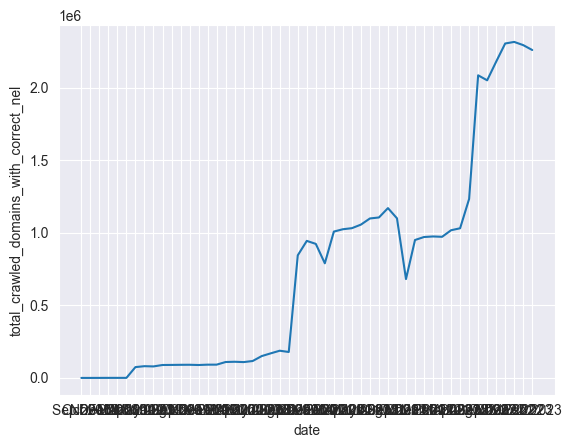

In [7]:
sns.lineplot(result, x='date', y='total_crawled_domains_with_correct_nel')

### RESOURCES queried within each month and those with valid NEL headers

In [8]:
result['nel_resource_percentage'] = result['total_crawled_resources_with_correct_nel'] / result['total_crawled_resources'] * 100
result[['date', 'total_crawled_resources', 'total_crawled_resources_with_correct_nel', 'nel_resource_percentage']]

,date,total_crawled_resources,total_crawled_resources_with_correct_nel,nel_resource_percentage
0,Sep 2018,189251267,2,0.00
0,Oct 2018,191683046,91,0.00
0,Nov 2018,162111236,1244,0.00
0,Dec 2018,305842812,2803,0.00
0,Feb 2019,351105672,2532,0.00
0,Mar 2019,370358301,3302,0.00
0,Apr 2019,427771979,1897583,0.44
0,May 2019,444564136,3726553,0.84
0,Jun 2019,443671879,2924495,0.66
0,Jul 2019,465370601,5278664,1.13


### Incorrect NEL deployment

In [9]:
result['domains_with_incorrect_nel'] = result['total_crawled_domains_with_nel'] - result['total_crawled_domains_with_correct_nel']
result['resources_with_incorrect_nel'] = result['total_crawled_resources_with_nel'] - result['total_crawled_resources_with_correct_nel']

# TODO ratio to the correct NEL

result[['date', 'domains_with_incorrect_nel', 'resources_with_incorrect_nel']]

,date,domains_with_incorrect_nel,resources_with_incorrect_nel
0,Sep 2018,1,16
0,Oct 2018,2,24
0,Nov 2018,6,66
0,Dec 2018,8,59
0,Feb 2019,12,60
0,Mar 2019,9,305
0,Apr 2019,10,388
0,May 2019,18,404
0,Jun 2019,21,673
0,Jul 2019,30,819
